In [34]:
%matplotlib inline
# Retina
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd


Reference for LSH: https://github.com/jinyeom/lsh-knn/tree/main

In [32]:
#LSH

In [14]:
from sklearn.neighbors import KDTree

class KDTreeKNN:
    def __init__(self):
        self.tree = None

    def fit(self, X):
        self.tree = KDTree(X)

    def query(self, query_pt, k=1):
        distances, indices = self.tree.query([query_pt], k=k)
        return indices[0]


In [15]:
class NaiveKNN:
    def __init__(self):
        self.data = None

    def fit(self, X):
        self.data = X

    def query(self, query_pt, k=1):
        distances = np.linalg.norm(self.data - query_pt, axis=1)
        nearest_indices = np.argsort(distances)[:k]
        return nearest_indices


In [17]:
import time
import matplotlib.pyplot as plt

# Function to measure time and memory usage
def benchmark_knn(knn, X, query_pt, k):
    start_time = time.time()
    knn.fit(X)
    fit_time = time.time() - start_time

    start_time = time.time()
    knn.query(query_pt, k)
    query_time = time.time() - start_time

    return fit_time, query_time

In [37]:
# Vary dataset size (N) and dimensionality (D)
dataset_sizes = [100, 500, 1000, 5000]
dimensions = [2, 10, 50]

# Define the query point
query_pt = np.random.rand(50)

# Run benchmark
results = { 'KDTree': [], 'Naive': []}
for N in dataset_sizes:
    for D in dimensions:
        X = np.random.rand(N, D)
        query_pt = np.random.rand(D)

        # lsh = LSH()
        # fit_time, query_time = benchmark_knn(lsh, X, query_pt, k=5)
        # results['LSH'].append((N, D, fit_time, query_time))


        kdtree = KDTreeKNN()
        fit_time, query_time = benchmark_knn(kdtree, X, query_pt, k=5)
        results['KDTree'].append((N, D, fit_time, query_time))

        # Naive KNN
        naive = NaiveKNN()
        fit_time, query_time = benchmark_knn(naive, X, query_pt, k=5)
        results['Naive'].append((N, D, fit_time, query_time))



In [41]:
i = 0
for N in dataset_sizes:
    for D in dimensions:
      print(results['Naive'][i])
      print(results["KDTree"][i])
      print()
      i+=1

(100, 2, 1.9073486328125e-06, 7.510185241699219e-05)
(100, 2, 0.0005729198455810547, 0.0002799034118652344)

(100, 10, 1.1920928955078125e-06, 6.222724914550781e-05)
(100, 10, 0.0003077983856201172, 0.00021338462829589844)

(100, 50, 1.1920928955078125e-06, 7.343292236328125e-05)
(100, 50, 0.0003936290740966797, 0.00026488304138183594)

(500, 2, 1.430511474609375e-06, 9.870529174804688e-05)
(500, 2, 0.0003998279571533203, 0.0002186298370361328)

(500, 10, 1.1920928955078125e-06, 0.00011682510375976562)
(500, 10, 0.0006730556488037109, 0.00026679039001464844)

(500, 50, 1.6689300537109375e-06, 0.00025844573974609375)
(500, 50, 0.003977775573730469, 0.0022749900817871094)

(1000, 2, 1.1920928955078125e-06, 0.0001659393310546875)
(1000, 2, 0.0006453990936279297, 0.0002899169921875)

(1000, 10, 1.430511474609375e-06, 0.00024127960205078125)
(1000, 10, 0.0014636516571044922, 0.00034737586975097656)

(1000, 50, 1.6689300537109375e-06, 0.00041103363037109375)
(1000, 50, 0.005438327789306641, 

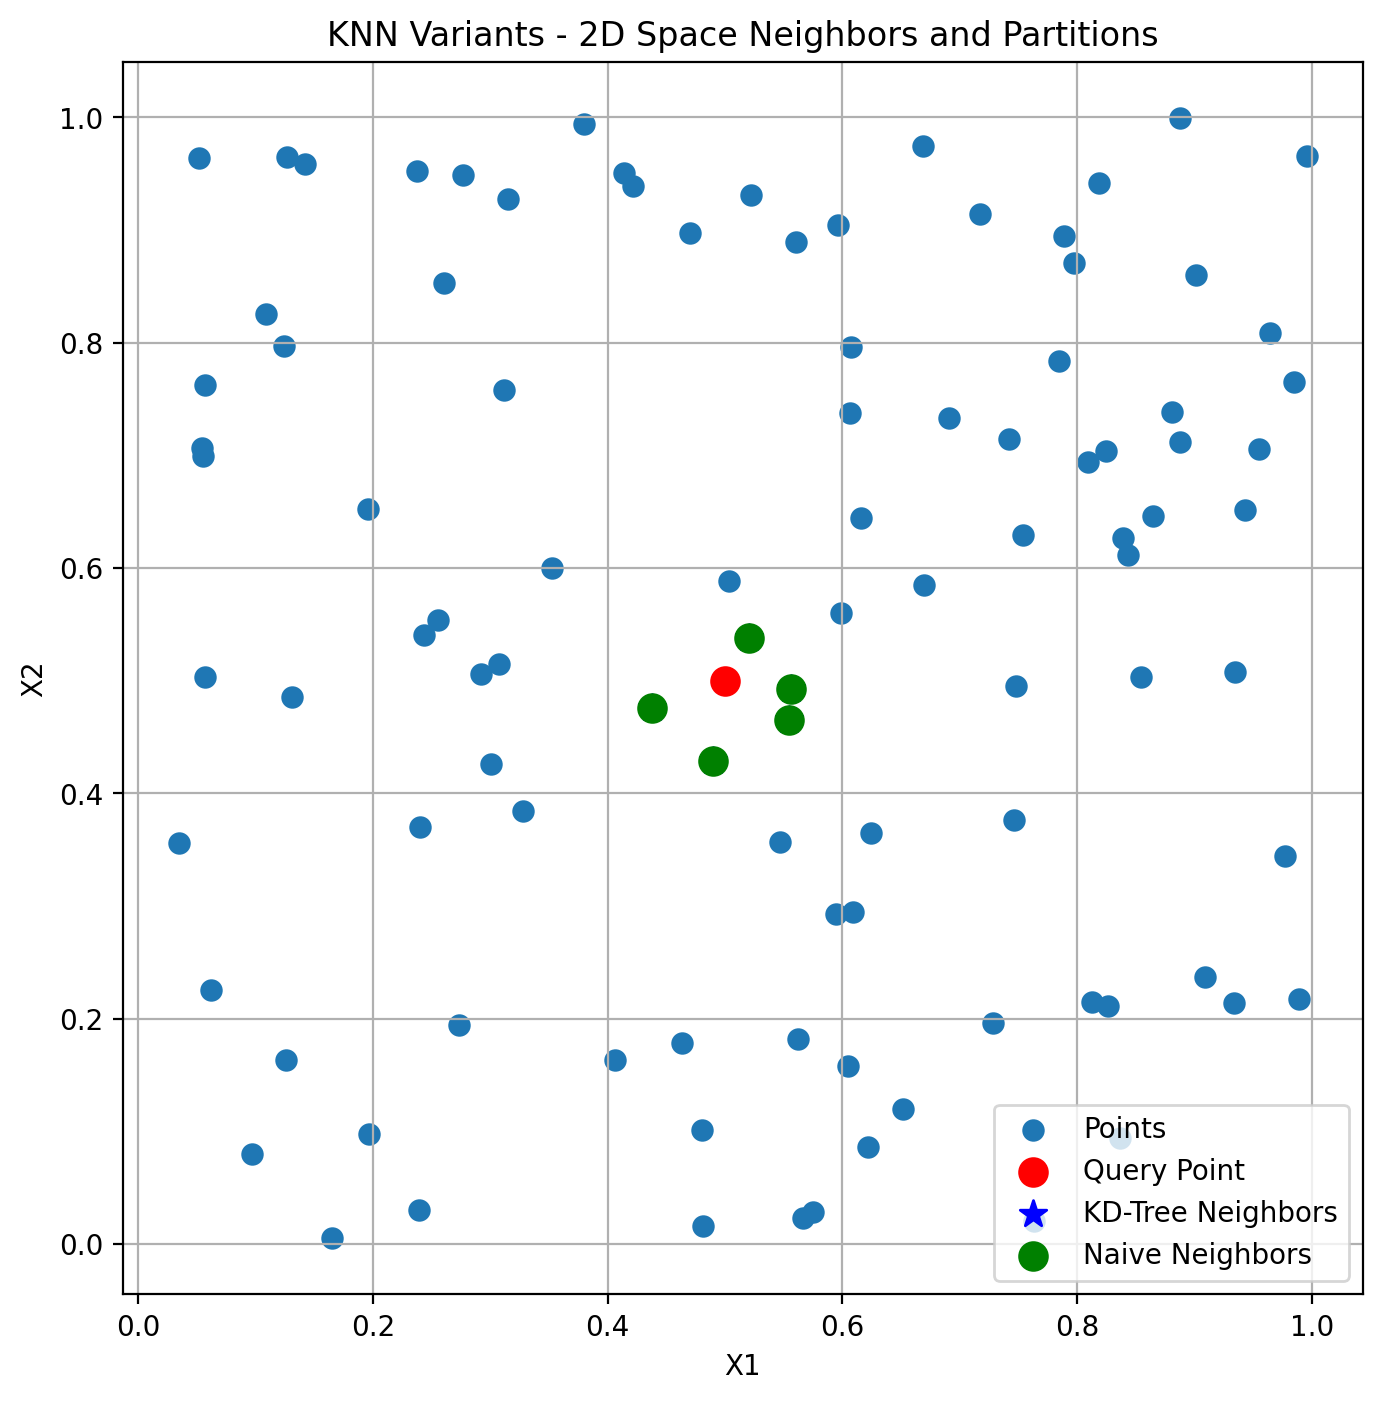

In [42]:
# Generate 2D dataset and query point
X_2d = np.random.rand(100, 2)
query_pt_2d = np.array([0.5, 0.5])

# Fit and query each KNN method

kdtree_2d = KDTreeKNN()
kdtree_2d.fit(X_2d)
kdtree_indices = kdtree_2d.query(query_pt_2d, k=5)

naive_2d = NaiveKNN()
naive_2d.fit(X_2d)
naive_indices = naive_2d.query(query_pt_2d, k=5)

# Plot dataset and highlight neighbors
plt.figure(figsize=(8, 8))
plt.scatter(X_2d[:, 0], X_2d[:, 1], label="Points", s=50)
plt.scatter(query_pt_2d[0], query_pt_2d[1], color='red', label="Query Point", s=100)

# Highlight Neighbors found by each method
plt.scatter(X_2d[kdtree_indices][:, 0], X_2d[kdtree_indices][:, 1], color='blue', label="KD-Tree Neighbors", marker="*", s=100)
plt.scatter(X_2d[naive_indices][:, 0], X_2d[naive_indices][:, 1], color='green', label="Naive Neighbors", marker="o", s=100)

# Display partitions if any method applies them
plt.legend()
plt.title("KNN Variants - 2D Space Neighbors and Partitions")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()
